# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#this function plots the confusion matrix 
def confusion_matrix(y,y_predict):
    """_summary_
    this function plots the confusion matrix to assess the model quality

    Args:
        y (np.array): the target values from the train_test_split
        y_predict (np.array): the predicted values from the model
    """
    from sklearn.metrics import confusion_matrix
    
    cm= confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True, ax=ax);
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data=pd.read_csv(url)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
url2= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X =pd.read_csv(url2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
Y = data['Class'].to_numpy()
Y.shape

(90,)

# feature scaling

In [9]:
transformer =preprocessing.StandardScaler()
X = transformer.fit_transform(X)
X

array([[-1.71291154e+00, -5.29526321e-17, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

# Splitting the data into the train and test groups

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
Y_test.shape 

(18,)

# Logistic regression

## Grid Search to find best logistic regressor for training data

In [12]:
parameters = {'C':[0.01,0.1,1],
                'penalty':['l2'],
                'solver':['lbfgs']}
lr=LogisticRegression()

In [13]:
logreg_cv=GridSearchCV(estimator=lr,
                        param_grid= parameters,
                        cv=10)

logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [14]:
print(f'tuned parameters: {logreg_cv.best_params_}')
print(f'accuracy: {logreg_cv.best_score_}')

tuned parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8464285714285713


In [18]:
print(f'accuracy: {logreg_cv.score(X_test, Y_test)}')

accuracy: 0.8333333333333334


# Plotting the confusion matrix

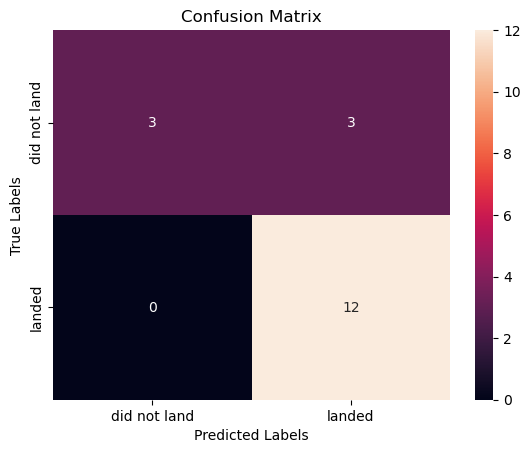

In [19]:
yhat =logreg_cv.predict(X_test)
confusion_matrix(Y_test, yhat)

# Support Vector Machine

In [20]:
parameters= {'kernel':('linear', 'rbf', 'poly', 'rbf','sigmoid'),
                'C': np.logspace(-3,3,5),
                'gamma':np.logspace(-3,3,5)}

svm = SVC()

In [21]:
svm_cv=GridSearchCV(estimator=svm,
                    param_grid=parameters,
                    cv=10)

svm_cv.fit(X_train,Y_train)

print(f'best parameteres: {svm_cv.best_params_}')
print(f'accuracy: {svm_cv.best_score_}')

best parameteres: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy: 0.8482142857142856


# confusion matrix for SVM

accuracy on test set:0.8333333333333334


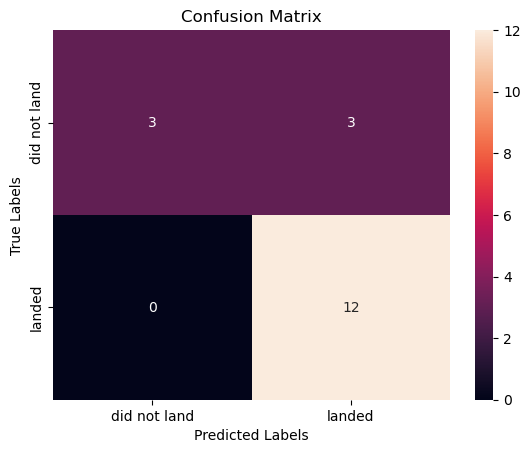

In [24]:
print(f'accuracy on test set:{svm_cv.score(X_test,Y_test)}')
yhat= svm_cv.predict(X_test)
confusion_matrix(Y_test, yhat)

# Decision Tree Classifier

In [25]:
parameters = {'criterion':['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth':[2*n for n in range(1,10)],
                'max_features': ['auto','sqrt'],
                'min_samples_leaf':[1,2,4],
                'min_samples_split':[2,5,10]}
tree = DecisionTreeClassifier()

In [26]:
tree_cv=GridSearchCV(estimator=tree,
                        param_grid=parameters,
                        cv=10)

In [28]:
tree_cv.fit(X_train, Y_train)

c:\Users\Sherrif\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Sherrif\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Sherrif\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Sherrif\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [30]:
print(f"tuned hyperparameters :{tree_cv.best_params_} ")
print(f"accuracy : {tree_cv.best_score_}")

tuned hyperparameters :{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'} 
accuracy : 0.8767857142857144


In [32]:
print(f'score on test set: {tree_cv.score(X_test,Y_test)}')

score on test set: 0.7777777777777778


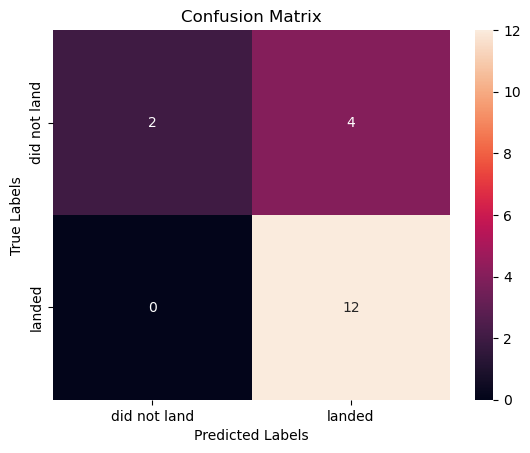

In [33]:
yhat= tree_cv.predict(X_test)
confusion_matrix(Y_test, yhat)

# K Nearest Neighbour

In [34]:
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'p':[1,2]}

Knn = KNeighborsClassifier()

In [35]:
knn_cv = GridSearchCV(estimator=Knn,
                        param_grid=parameters,
                        cv=10)

In [36]:
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [37]:
print(f"tuned hyperparameters :{knn_cv.best_params_} ")
print(f"accuracy : {knn_cv.best_score_}")
print(f'score on test set: {knn_cv.score(X_test,Y_test)}')

tuned hyperparameters :{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1} 
accuracy : 0.8482142857142858
score on test set: 0.8333333333333334


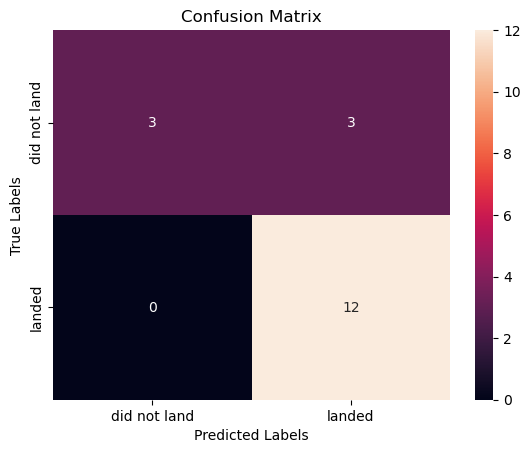

In [38]:
yhat= knn_cv.predict(X_test)
confusion_matrix(Y_test, yhat)